# Notebook per lo studio delle caratteristiche del dataset

## ScenicOrNot

In questo notebook si eseguono analisi quantitative e qualitative sulle caratteristiche del dataset, per ottenere informazioni utili avvo svolgimento dei task delle tre reti nei noteboon 'Distribution_CNN', 'Regression_CNN' e 'Classification_CNN'.

## Importazione e preparazione degli array

In [1]:
#importazione degli array dei dataset

import numpy as np

features_files = [
    '/kaggle/input/scenicornot/array_immagini224_completo11voti1.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti2.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti3.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti4.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti5.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti6.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti7.npy',
    '/kaggle/input/scenicornot/array_immagini224_completo11voti8.npy'
]
votes_files = [
    '/kaggle/input/scenicornot/array_voti_completo11voti1.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti2.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti3.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti4.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti5.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti6.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti7.npy',
    '/kaggle/input/scenicornot/array_voti_completo11voti8.npy'
]

features = []
votes = []

for features_file, votes_file in zip(features_files, votes_files):
    features_array = np.load(features_file, allow_pickle=True)
    votes_array = np.load(votes_file, allow_pickle=True)
    
    features.append(features_array)
    votes.append(votes_array)
    
    # Elimina gli array singoli
    del features_array, votes_array

# Concatena gli array
features = np.concatenate(features, axis=0)
votes = np.concatenate(votes, axis=0)

In [2]:
features = features/255

## Creazione degli array con le macroclasses e le macroclasses hot encoded

In [3]:
import tensorflow as tf

# encoding e hot encoding dei voti sulle 3 macroclassi

macroclasses = tf.argmax(tf.stack([tf.reduce_sum(votes[:, :3], axis=1), tf.reduce_sum(votes[:, 3:6], axis=1), tf.reduce_sum(votes[:, 6:], axis=1)], axis=1), axis=1) 
hot_macroclasses = tf.one_hot(macroclasses, depth=3)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Creazione del vettore con le medie per regressione

In [4]:
# creazione degli array con le valutazioni medie

means = tf.reduce_sum(votes*[1,2,3,4,5,6,7,8,9,10], axis=1)
mean_class = tf.where(means <= 3, 0.0, tf.where(means <= 6, 1.0, 2.0))

## Visualizzare 10 immagini random

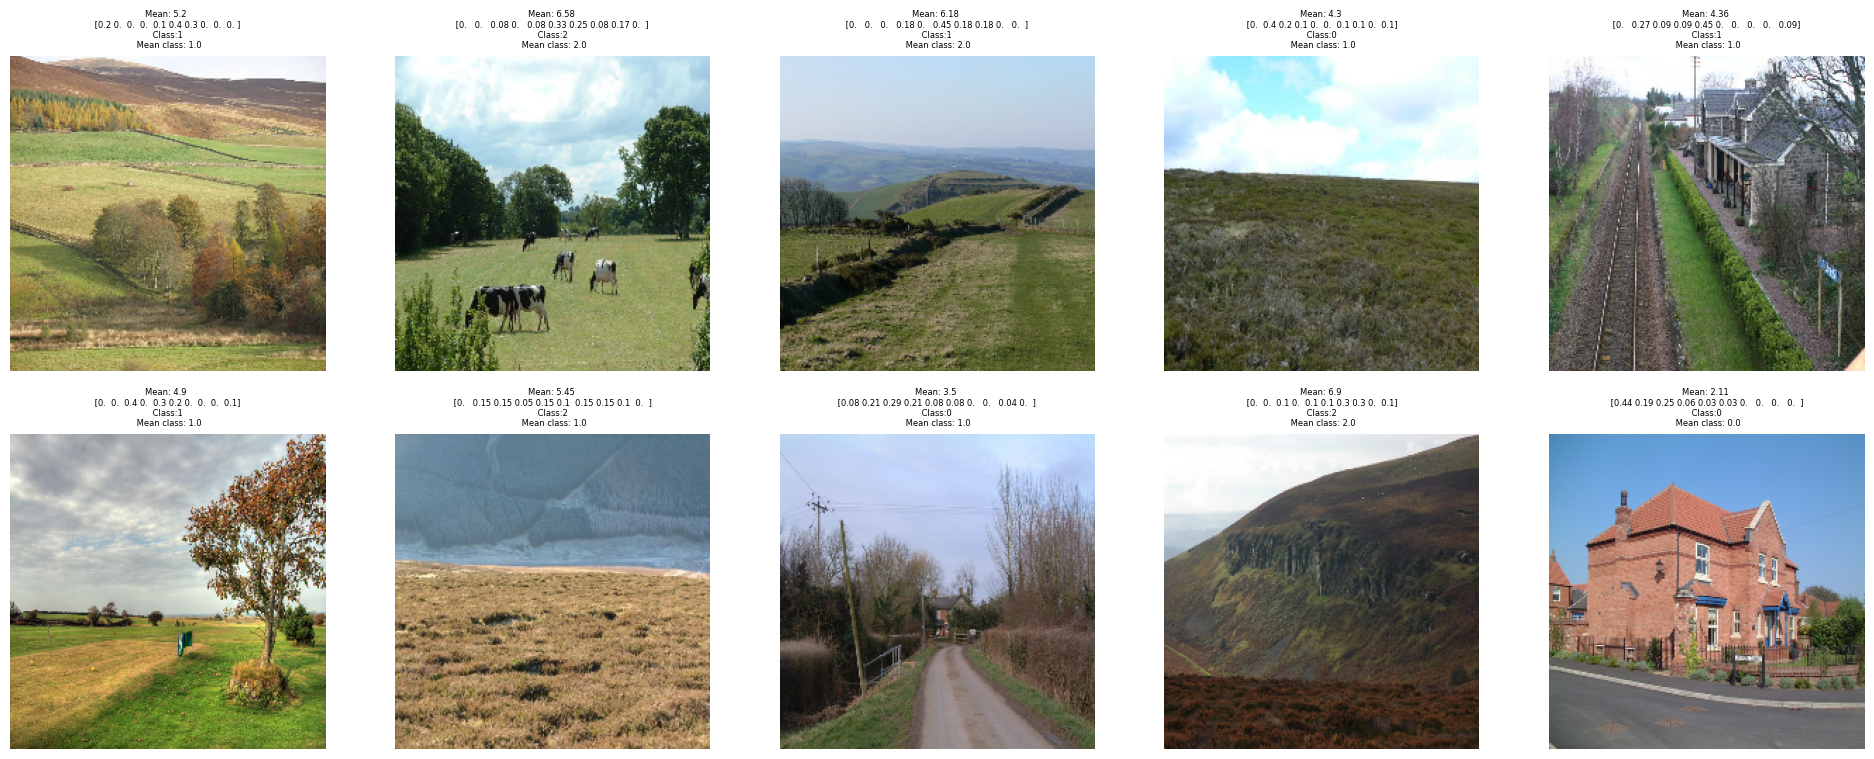

In [5]:
random_rows = np.random.choice(features.shape[0], size=10, replace=False)

import matplotlib.pyplot as plt

# visualizzare le prime 10 immagini e lable
fig, axs = plt.subplots(2,5,figsize=(24,9))

for i in np.arange(10):

    ax = axs.ravel()[i]
    idx=random_rows[i]
        
    ax.imshow(features[idx], cmap='gray')
    ax.set_title('Mean: {} \n {} \n Class:{} \n Mean class: {}'.format(np.round(means[idx], decimals=2),np.round(votes[idx],decimals=2),macroclasses[idx], mean_class[idx]), fontsize=6)
    ax.axis('off')

Si nota che confrontare il probela di classificazione con quello di regressione non sarà immediato, poichè anche l'assegnazione delle classi cambia in base a come viene definito il problema.

## Distribuzioni per i diversi problemi

Predizione della distribuzione: istogramma della frequenza con cui una classe compare in un'immagine con probabilità massima

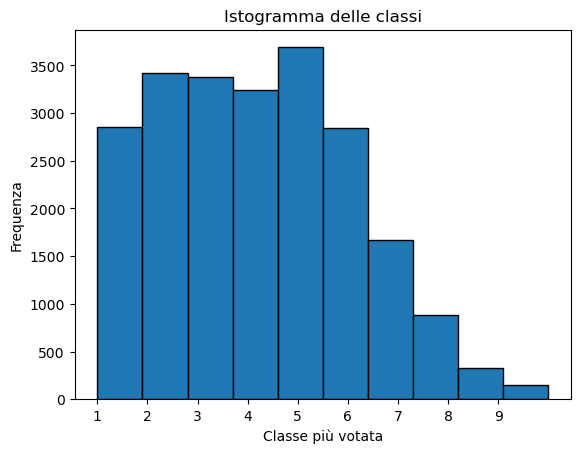

In [7]:
# distribuzione delle classi più votate 

top_votes = np.argmax(votes,axis=1)+1

# Creazione dell'istogramma
plt.hist(top_votes, bins=10, edgecolor='black')

plt.xlabel('Classe più votata')
plt.ylabel('Frequenza')
plt.title('Istogramma delle classi')
plt.xticks(np.arange(1, 10, 1))

plt.show()

L'istogramma delle classi evidenzia una notevole sottorappresentazione delle classi superiori al punteggio 6, che renderà necessario applicare una data augmentation selettiva prima di utilizzare i dati per il training della rete.

Visualizzazione di alcune immagini con la loro distribuzione.

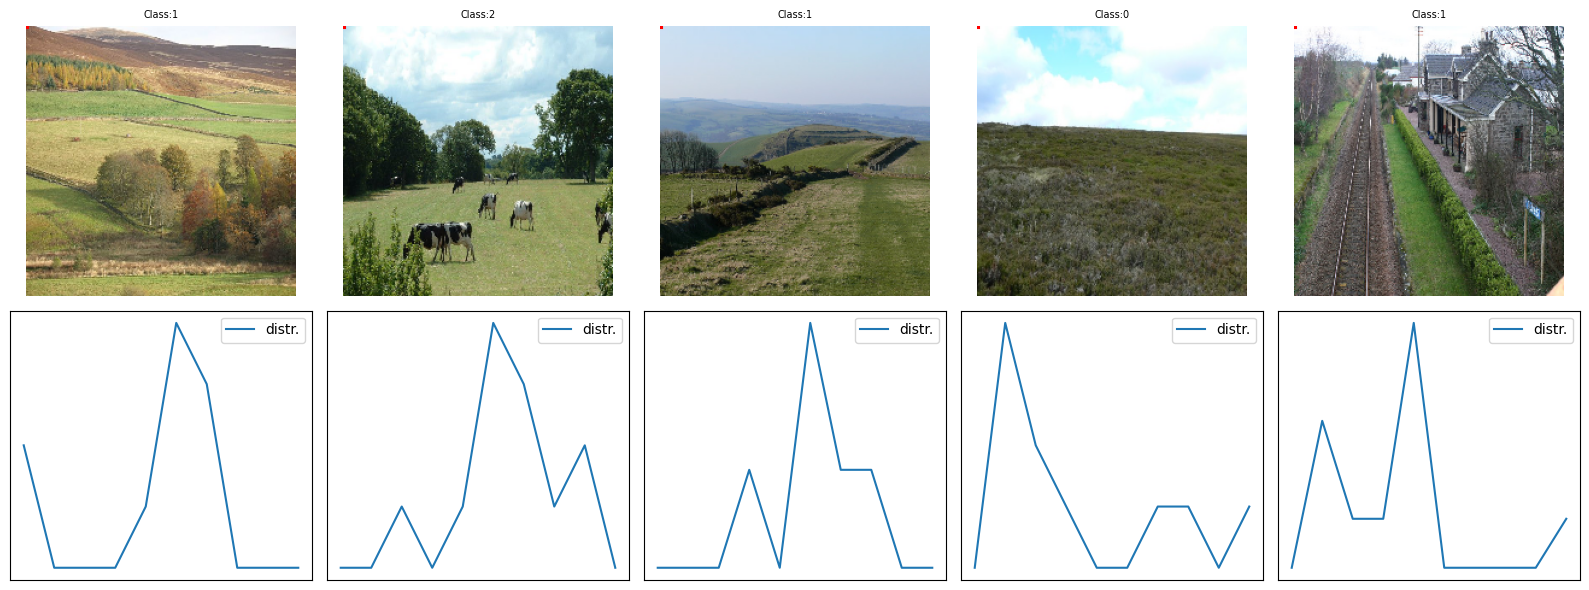

In [20]:
import matplotlib.patches as patches

true_stacked = tf.stack([tf.reduce_sum(votes[:, :3], axis=1), tf.reduce_sum(votes[:, 3:6], axis=1), tf.reduce_sum(votes[:, 6:], axis=1)], axis=1)
    
true_macroclass = tf.argmax(true_stacked, axis=1)

fig, axs = plt.subplots(2, 5, figsize=(16, 6))

for i in range(5):
    ax = axs[0, i]
    idx = random_rows[i]
    
    ax.imshow(features[idx], cmap='gray')
    ax.set_title('Class:{}'.format(true_macroclass[idx]), fontsize=7)
    ax.axis('off')

    # Creazione di un secondo subplot per i plot di y_true e y_pred
    rect = plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='red', lw=1.5)
    ax.add_patch(rect)
    ax2 = axs[1, i]
    ax2.plot(votes[idx], label='distr.')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.legend()

plt.tight_layout()
plt.show()

Predizione della media: istogramma con le frequenze di apparizione di un certo valore medio

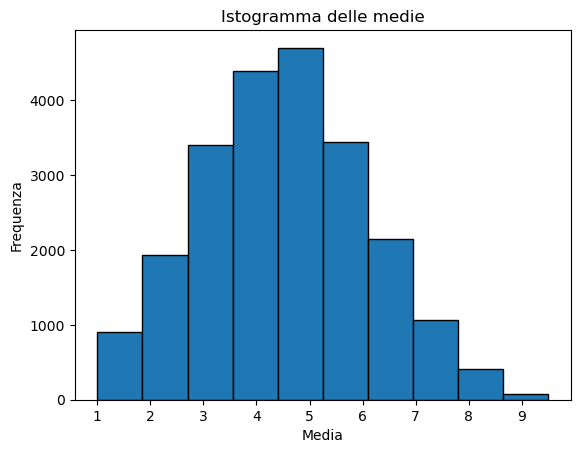

In [9]:
# distribuzione dei punteggi medi 

# Creazione dell'istogramma
plt.hist(means, bins=10, edgecolor='black')

plt.xlabel('Media')
plt.ylabel('Frequenza')
plt.title('Istogramma delle medie')
plt.xticks(np.arange(1, 10, 1))

plt.show()

Anche in questo caso la distribuzione è sbilanciata, ma non trattandosi di un problema di classificazione sarà importante mantenere lo squilibrio tra le frequenze di punteggi perchè, anche se tuttavia, per impedire che il range delle previsioni sia molto ridotto rispetto al range dei punteggi di training, sarà necessario implementare una loss pesata che penalizzi maggiormente gli errori effettuati su immagini con punteggi medi estremi.

Valutazione delle previsioni della media su tre classi

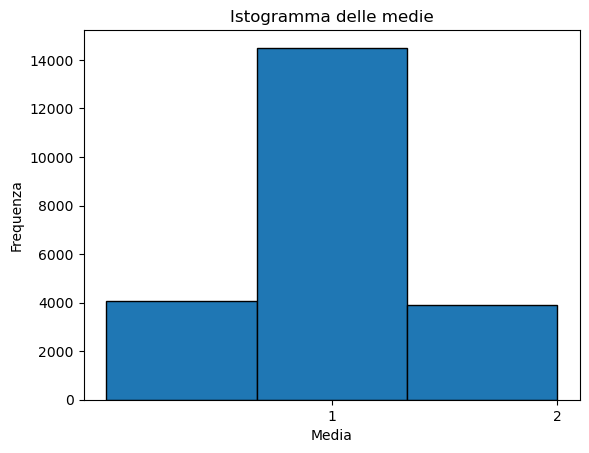

In [11]:
# distribuzione dei punteggi medi in classi

# Creazione dell'istogramma
plt.hist(mean_class, bins=3, edgecolor='black')

plt.xlabel('Media')
plt.ylabel('Frequenza')
plt.title('Istogramma delle medie')
plt.xticks(np.arange(1, 3, 1))

plt.show()

Si può ripetere la stessa osservazione per l'istogramma delle classi, anche se questo mette in evidenza una difficoltà di confronto tra i metodi, siccome in un certo senso il problema di classificazione su tre classi è 'più facile' quando riparafrasato nei termini del problema di regression elineare.

Classificazione su tre classi: istogramma delle probabilità su tre classi (considerando la somma delle probabilità sulle classi più fini)

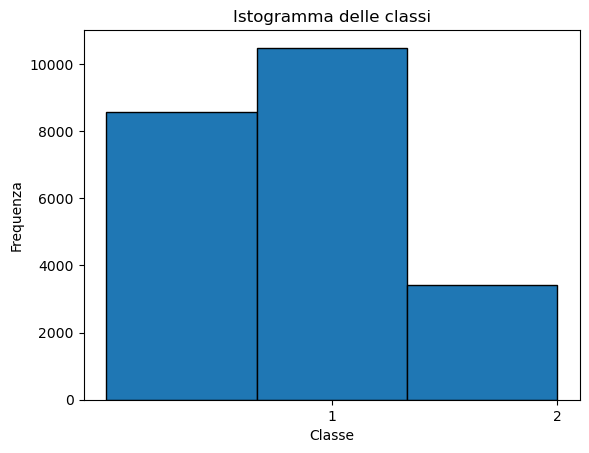

In [14]:
# Crea l'istogramma delle frequenze sulle 3 classi

# Creazione dell'istogramma
plt.hist(macroclasses, bins=3, edgecolor='black')

plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.title('Istogramma delle classi')
plt.xticks(np.arange(1, 3, 1))

plt.show()

Per il problema di classificazione su 3 macroclassi si procederà ad un'augmentazione selettiva sulla terza macroclasse, che risulta sottorappresentata.